**Importing necessary libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import preprocessing
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import FileLink
import joblib
import random
import shutil

In [2]:
from functools import partial

from keras.models import Model
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Concatenate
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import Input
from keras.layers import Lambda
from keras.layers import MaxPooling2D
from keras.layers import add
from keras import backend as K

**Creating the augmented_actor_images folder**

In [3]:
import os

# Define the base directory
base_dir = '/content/actor'

# Define the paths for the subdirectories
augmented_images_dir = os.path.join(base_dir, 'augmented_actor_images')

# Create the base directory
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Create the 'augmented_actor_images' directory
if not os.path.exists(augmented_images_dir):
    os.makedirs(augmented_images_dir)

print("Folders created successfully!")


Folders created successfully!




*   **Creating the actor_original_images folder.**

*   **Scraping the images of Ayushmann Khurrana from pinterest.**



In [4]:
import requests
from bs4 import BeautifulSoup
import os

def getdata(url):
    r = requests.get(url)
    return r.text

htmldata = getdata("https://in.pinterest.com/nazneen2499/ayushmann-khurrana/")
soup = BeautifulSoup(htmldata, 'html.parser')
base_folder = "/content/actor/actor_original_images"
# Create the folder if it doesn't exist
folder_name = os.path.join(base_folder, "Ayushmann Khurrana")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")


All images downloaded successfully!


**Scraping the images of Shahrukh Khan from pinterest.**

In [5]:
htmldata = getdata("https://www.pinterest.com/hanisrk/shah-rukh-khan/")
soup = BeautifulSoup(htmldata, 'html.parser')

# Create the folder if it doesn't exist
folder_name = os.path.join(base_folder,"Shahrukh Khan")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")

All images downloaded successfully!


**Scraping the images of Deepika Padukone from pinterest.**

In [6]:
htmldata = getdata("https://in.pinterest.com/alkaeng/deepika/")
soup = BeautifulSoup(htmldata, 'html.parser')

# Create the folder if it doesn't exist
folder_name =os.path.join(base_folder,"Deepika Padukone")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")

All images downloaded successfully!


**Scraping the images of Hrithik Roshan from pinterest.**

In [7]:
htmldata = getdata("https://in.pinterest.com/grahulp3/hritik-roshan/")
soup = BeautifulSoup(htmldata, 'html.parser')

# Create the folder if it doesn't exist
folder_name = os.path.join(base_folder,"Hrithik Roshan")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")

All images downloaded successfully!


**Scraping the images of Ranveer Singh from pinterest.**

In [8]:
htmldata = getdata("https://www.pinterest.com/ansariaayeezaa4/ranveer-singh/")
soup = BeautifulSoup(htmldata, 'html.parser')

# Create the folder if it doesn't exist
folder_name = os.path.join(base_folder,"Ranveer Singh")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")

All images downloaded successfully!


**Scraping the images of Tripti Dimri from pinterest.**

In [9]:
htmldata = getdata("https://in.pinterest.com/modibhavesh55/tripti-dimri/")
soup = BeautifulSoup(htmldata, 'html.parser')

# Create the folder if it doesn't exist
folder_name = os.path.join(base_folder,"Tripti Dimri")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")

All images downloaded successfully!


**Scraping the images of Anushka Sharma from pinterest.**

In [10]:
htmldata = getdata("https://www.pinterest.com/aryanrahman248/anushka-sharma/")
soup = BeautifulSoup(htmldata, 'html.parser')

# Create the folder if it doesn't exist
folder_name = os.path.join(base_folder,"Anushka Sharma")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")

All images downloaded successfully!


**Scraping the images of Mrunal Thakur from pinterest.**

In [11]:
htmldata = getdata("https://in.pinterest.com/sonu3161/mrunal-thakur/")
soup = BeautifulSoup(htmldata, 'html.parser')

# Create the folder if it doesn't exist
folder_name = os.path.join(base_folder,"Mrunal Thakur")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_urls = []
for item in soup.find_all('img'):
    image_urls.append(item['src'])

for index, url in enumerate(image_urls):
    # Get the image data
    image_data = requests.get(url).content

    # Save the image to the folder
    file_name = os.path.join(folder_name, f"image_{index + 1}.jpg")
    with open(file_name, 'wb') as f:
        f.write(image_data)

print("All images downloaded successfully!")

All images downloaded successfully!


**To address the issue of insufficient data, I am performing data augmentation on the scraped images. Each actor's dataset currently consists of only 15 images, which is inadequate for effective face recognition. With such a limited dataset, the model struggles to learn meaningful features and generalize well to new data, leading to poor performance.**

*Data augmentation helps mitigate this problem by artificially increasing the size of the training set. This process involves applying various transformations to the original images, such as rotations, translations, flips, and scaling. By creating multiple variations of each image, we can simulate a larger and more diverse dataset. This enhanced dataset allows the model to learn more robust features and improves its ability to generalize from the limited original images.*

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Path to the root directory containing actor folders
root_dir = "/content/actor/actor_original_images"

# List of actor folders
actor_folders = [
    'Hrithik Roshan', 'Ayushmann Khurrana', 'Anushka Sharma',
    'Shahrukh Khan', 'Mrunal Thakur', 'Tripti Dimri',
    'Ranveer Singh', 'Deepika Padukone'
]

# Number of augmentations per image
num_augmentations = 5

for actor in actor_folders:
    actor_folder_path = os.path.join(root_dir, actor)
    augmented_actor_folder_path = os.path.join(augmented_images_dir, actor)

    if not os.path.exists(augmented_actor_folder_path):
        os.makedirs(augmented_actor_folder_path)

    for filename in os.listdir(actor_folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(actor_folder_path, filename)
            img = cv2.imread(img_path)
            img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels)

            i = 0
            for batch in datagen.flow(img, batch_size=1,
                                      save_to_dir=augmented_actor_folder_path,
                                      save_prefix=actor + '_aug', save_format='jpg'):
                i += 1
                if i >= num_augmentations:
                    break


**Downloading the folders in the form of a zip file**

In [19]:
from google.colab import files
!zip -r /content/actor/actor_original_images.zip /content/actor/actor_original_images
files.download("/content/actor/actor_original_images.zip")
!zip -r /content/actor/augmented_actor_images.zip /content/actor/augmented_actor_images
files.download("/content/actor/augmented_actor_images.zip")

updating: content/actor/actor_original_images/ (stored 0%)
updating: content/actor/actor_original_images/Ranveer Singh/ (stored 0%)
updating: content/actor/actor_original_images/Ranveer Singh/image_11.jpg (deflated 1%)
updating: content/actor/actor_original_images/Ranveer Singh/image_8.jpg (deflated 1%)
updating: content/actor/actor_original_images/Ranveer Singh/image_13.jpg (deflated 1%)
updating: content/actor/actor_original_images/Ranveer Singh/image_10.jpg (deflated 2%)
updating: content/actor/actor_original_images/Ranveer Singh/image_5.jpg (deflated 1%)
updating: content/actor/actor_original_images/Ranveer Singh/image_9.jpg (deflated 1%)
updating: content/actor/actor_original_images/Ranveer Singh/image_12.jpg (deflated 1%)
updating: content/actor/actor_original_images/Ranveer Singh/image_14.jpg (deflated 1%)
updating: content/actor/actor_original_images/Ranveer Singh/image_2.jpg (deflated 28%)
updating: content/actor/actor_original_images/Ranveer Singh/image_6.jpg (deflated 8%)
up

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/actor/augmented_actor_images/ (stored 0%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/ (stored 0%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_8_aug_1.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/Ranveer Singh_aug_0_7721.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_7_aug_3.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_14_aug_3.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_14_aug_1.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_3_aug_3.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_5_aug_3.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_3_aug_4.jpg (deflated 1%)
  adding: content/actor/augmented_actor_images/Ranveer Singh/image_9_aug_1.jpg (deflated 1%)
  adding: conten

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Visualizing some of the images of actors.**

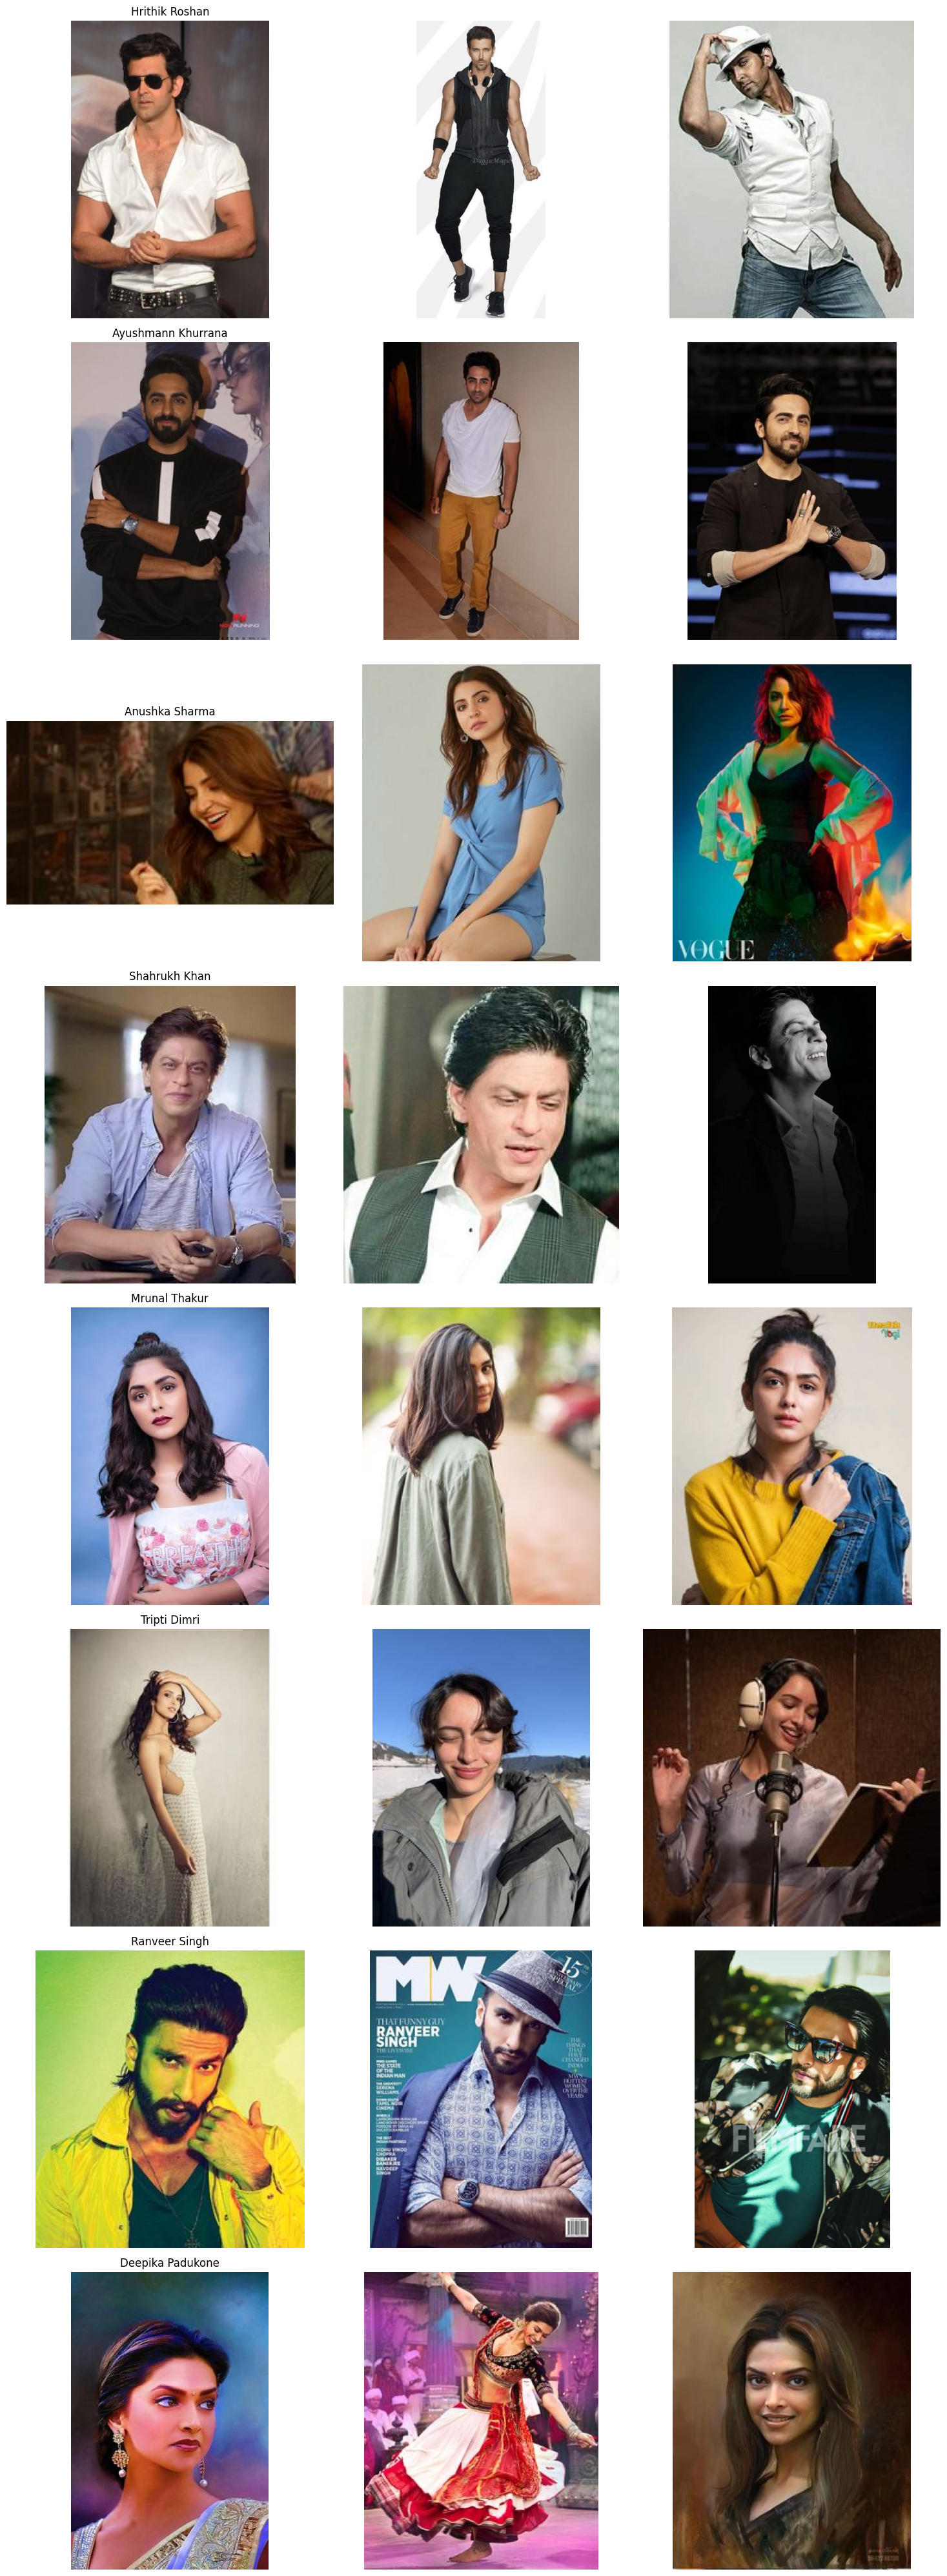

In [12]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the root directory containing actor folders
root_dir = "/content/actor/actor_original_images"

# List of actor folders
actor_folders = [
    'Hrithik Roshan', 'Ayushmann Khurrana', 'Anushka Sharma',
    'Shahrukh Khan', 'Mrunal Thakur', 'Tripti Dimri',
    'Ranveer Singh', 'Deepika Padukone'
]

# Number of random images to show per class
num_images_to_show = 3

# Create a figure with subplots
fig, axes = plt.subplots(len(actor_folders), num_images_to_show, figsize=(15, len(actor_folders) * 5))

for i, actor in enumerate(actor_folders):
    folder_path = os.path.join(root_dir, actor)

    # Get all jpg images in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

    # Randomly sample images
    random_images = random.sample(image_files, min(num_images_to_show, len(image_files)))

    for j, img_file in enumerate(random_images):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)

        # Show the image
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(actor)

# Adjust layout
plt.tight_layout()
plt.show()

**I am setting up a PyTorch dataset for image classification by applying transformations such as resizing and normalization. I have loaded images from specified folders, and then split the dataset into training, validation, and test sets based on a 70-20-10% split.**

In [16]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os

# Define transformations if needed (e.g., resizing)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# List directories to verify folder names
print("Available folders:", os.listdir(root_dir))

# Directories for original images
folders = [
    'Shahrukh Khan',
    'Ayushmann Khurrana',
    'Ranveer Singh',
    'Tripti Dimri',
    'Mrunal Thakur'
    'Deepika Padukone',
    'Hrithik Roshan',
    'Anushka Sharma'
]

# Load dataset from the augmented image folders
dataset = datasets.ImageFolder(root=root_dir, transform=transform)

# Print dataset info
print(f"Number of images: {len(dataset)}")
print(f"Classes: {dataset.classes}")

# Split dataset
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

Available folders: ['Ranveer Singh', 'Deepika Padukone', 'Tripti Dimri', 'Hrithik Roshan', 'Mrunal Thakur', 'Anushka Sharma', 'Ayushmann Khurrana', 'Shahrukh Khan']
Number of images: 111
Classes: ['Anushka Sharma', 'Ayushmann Khurrana', 'Deepika Padukone', 'Hrithik Roshan', 'Mrunal Thakur', 'Ranveer Singh', 'Shahrukh Khan', 'Tripti Dimri']


# SVM with PCA

**Support Vector Machine (SVM) combined with Principal Component Analysis (PCA) is used for its effectiveness in handling high-dimensional data with reduced computational complexity. PCA helps to reduce the dimensionality of the image data, which can improve the performance of SVM by focusing on the most significant features. SVM is particularly useful for its strong classification performance on smaller datasets, but it can struggle with very high-dimensional or large-scale data, making PCA a useful preprocessing step.**

Found 444 images belonging to 8 classes.
Found 18 images belonging to 8 classes.
Class names: ['Anushka Sharma', 'Ayushmann Khurrana', 'Deepika Padukone', 'Hrithik Roshan', 'Mrunal Thakur', 'Ranveer Singh', 'Shahrukh Khan', 'Tripti Dimri']


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Grid search took 6.28s
The best model is: {'C': 10, 'gamma': 1e-06, 'kernel': 'rbf'}.
The best mean accuracy:  0.3094075079149706
Validation Accuracy: 44.4%
                    precision    recall  f1-score   support

    Anushka Sharma       0.00      0.00      0.00         2
Ayushmann Khurrana       1.00      0.67      0.80         3
  Deepika Padukone       0.00      0.00      0.00         2
    Hrithik Roshan       0.33      0.50      0.40         2
     Mrunal Thakur       1.00      1.00      1.00         2
     Ranveer Singh       0.00      0.00      0.00         2
     Shahrukh Khan       0.38      1.00      0.55         3
      Tripti Dimri       0.00      0.00      0.00         2

          accuracy                           0.44        18
         macro avg       0.34      0.40      0.34        18
      weighted avg       0.38      0.44      0.38        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


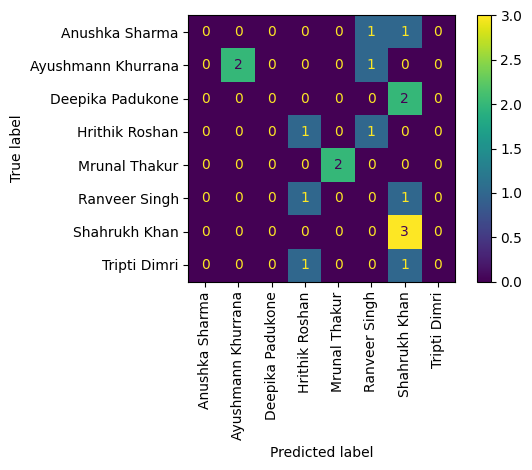

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import time

# Paths to your dataset
train_dir = '/content/actor/augmented_actor_images'
valid_dir = '/content/actor/actor_original_images'

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(train_dir,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training',
                                                 shuffle=False)

validation_generator = datagen.flow_from_directory(valid_dir,
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      subset='validation',
                                                      shuffle=False)

# Extract image data and labels
def extract_data(generator):
    images = []
    labels = []
    for batch_images, batch_labels in generator:
        images.append(batch_images)
        labels.append(batch_labels)
        if len(images) * generator.batch_size >= generator.samples:
            break
    return np.vstack(images), np.vstack(labels)

X_train, y_train = extract_data(train_generator)
X_val, y_val = extract_data(validation_generator)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# Use class names from the generator
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)  # Print to verify

# Perform PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))  # Flatten the images
X_val_scaled = scaler.transform(X_val.reshape(X_val.shape[0], -1))  # Flatten the images

pca = PCA(n_components=50)  # Example number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Split training data for hyperparameter tuning
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_pca, y_train_encoded, random_state=42)

# Define and train the SVM model with GridSearchCV
clf = SVC(class_weight='balanced', random_state=42)
parameters = {'C': [0.1, 1, 10],
              'gamma': [1e-3, 1e-6, 1e-9],
              'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)
t0 = time.time()
grid_search.fit(X_train_split, y_train_split)
print("Grid search took %0.2fs" % (time.time() - t0))
print(f"The best model is: {grid_search.best_params_}.")
print("The best mean accuracy: ", grid_search.best_score_)

# Test the best model
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_val_pca)
print(f"Validation Accuracy: {clf_best.score(X_val_pca, y_val_encoded) * 100:.1f}%")

# Print classification report
print(classification_report(y_val_encoded, pred, target_names=class_names))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(
    clf_best, X_val_pca, y_val_encoded, display_labels=class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()


Accuracy: 44.4%

Precision: Varied significantly across classes, with notable performance for Ayushmann Khurrana (1.00) and Mrunal Thakur (1.00).

Recall: High for Mrunal Thakur (1.00), but very low or zero for other classes.

F1-Score: High for Mrunal Thakur (1.00), but overall low due to poor performance in other classes.

Comments: The SVM + PCA model has a mixed performance with high precision and recall for some classes but fails to generalize well across most classes. The accuracy is relatively higher compared to deep learning models, but performance is inconsistent.

# VGG16

**VGG16 is chosen due to its deep architecture and proven effectiveness in image classification tasks. With its 16 layers, VGG16 excels in capturing complex hierarchical features of images, making it suitable for distinguishing between different actors. Although it requires substantial computational resources and may be prone to overfitting on small datasets, its high performance on large-scale image recognition tasks justifies its use for extracting rich feature representations from the limited dataset available.**

Found 444 images belonging to 8 classes.
Found 111 images belonging to 8 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.1620 - loss: 6.7172 - val_accuracy: 0.2432 - val_loss: 2.7770
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 322ms/step - accuracy: 0.2798 - loss: 2.9973 - val_accuracy: 0.5315 - val_loss: 1.4984
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.5452 - loss: 1.3841 - val_accuracy: 0.6126 - val_loss: 1.2675
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.5969 - loss: 1.1288 - val_accuracy: 0.6577 - val_loss: 1.1734
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.6712 - loss: 0.9728 - val_accuracy: 0.6306 - val_loss: 1.0453
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.7288 - loss: 0.8882 - val_accuracy: 0.7117 - val_loss: 0.9400
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 401ms/step - accuracy: 0.7765 - loss: 0.6813 - val_accuracy: 0.7477 - val_loss: 0.8079
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.8230 - loss: 0.5345 - val_accuracy: 0.7207 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.7345 - loss: 0.7147
Validation Loss: 0.6973944306373596
Validation Accuracy: 0.7477477192878723
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step

Classification Report:
                    precision    recall  f1-score   support

    Anushka Sharma       0.45      0.36      0.40        14
Ayushmann Khurrana       0.00      0.00      0.00        15
  Deepika Padukone       0.08      0.08      0.08        13
    Hrithik Roshan       0.18      0.14      0.16        14
     Mrunal Thakur       0.08      0.08      0.08        13
     Ranveer Singh       0.00      0.00      0.00        13
     Shahrukh Khan       0.13      0.13      0.13        15
      Tripti Dimri       0.15      0.21      0.18        14

          accuracy                           0.13       111
         macro avg       0.13      0.13      0.13       111
      weighted avg       0.14      0.13      0.13       111


Confusion Matrix:
[[5 2 2 2 1 1 0 1]
 [0 0 1 1 2 0 5 6]
 [1 1 1 

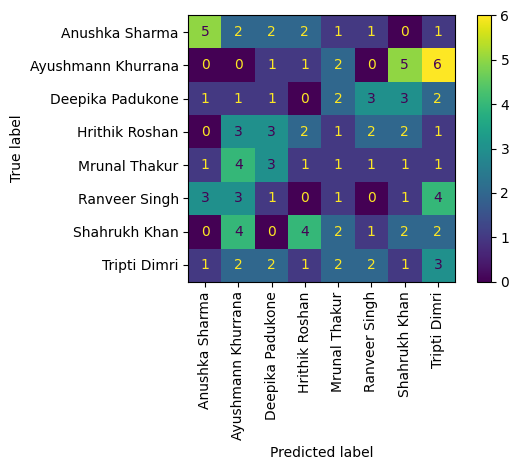

In [20]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Define directories
train_dir = '/content/actor/augmented_actor_images'

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set aside 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the trained model
model.save('/content/actor/vgg16_actor_model.h5')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Make predictions on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()


Accuracy: 13.0%

Precision: Low across all classes, with Anushka Sharma showing the highest precision (0.45).

Recall: Very low, with none of the classes having good recall scores.

F1-Score: Consistently low, indicating poor performance in capturing true positives.

Comments: VGG16 has the lowest accuracy among the models and shows poor performance in terms of precision, recall, and F1-score across all classes. This suggests that VGG16 might not be well-tuned for this dataset or task.

# ResNet50

**ResNet50 is selected for its ability to handle deeper networks through its residual connections, which address the vanishing gradient problem and allow for training of very deep models effectively. This model's architecture includes 50 layers and is designed to learn residuals, making it robust for capturing intricate patterns in image data. Despite the small dataset, ResNet50's advanced feature extraction capabilities and skip connections can help mitigate overfitting and improve classification performance.**

Found 444 images belonging to 8 classes.
Found 111 images belonging to 8 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1838 - loss: 2.4841 - val_accuracy: 0.1261 - val_loss: 2.1338
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.1626 - loss: 2.2966 - val_accuracy: 0.1171 - val_loss: 2.0688
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.1142 - loss: 2.1554 - val_accuracy: 0.1802 - val_loss: 2.0608
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.2101 - loss: 2.0704 - val_accuracy: 0.2252 - val_loss: 2.0262
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.1669 - loss: 2.0662 - val_accuracy: 0.2432 - val_loss: 2.0253
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.2077 - loss: 2.0327 - val_accuracy: 0.2252 - val_loss: 2.0213
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 297ms/step - accuracy: 0.1726 - loss: 2.0434 - val_accuracy: 0.1982 - val_loss: 2.0138
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 396ms/step - accuracy: 0.1948 - loss: 2.0435 - val_accuracy: 0.2432 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.2130 - loss: 1.9969
Validation Loss: 1.9990102052688599
Validation Accuracy: 0.22522522509098053
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step

Classification Report:
                    precision    recall  f1-score   support

    Anushka Sharma       0.11      0.29      0.16        14
Ayushmann Khurrana       0.00      0.00      0.00        15
  Deepika Padukone       0.00      0.00      0.00        13
    Hrithik Roshan       0.33      0.21      0.26        14
     Mrunal Thakur       0.00      0.00      0.00        13
     Ranveer Singh       0.00      0.00      0.00        13
     Shahrukh Khan       0.16      0.67      0.26        15
      Tripti Dimri       0.00      0.00      0.00        14

          accuracy                           0.15       111
         macro avg       0.08      0.15      0.09       111
      weighted avg       0.08      0.15      0.09       111


Confusion Matrix:
[[ 4  1  0  2  0  0  7  0]
 [ 5  0  0  0  0  0 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


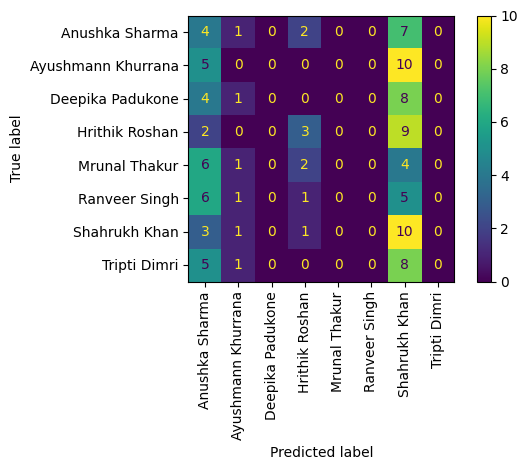

In [21]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define directories
train_dir = '/content/actor/augmented_actor_images'

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set aside 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the trained model
model.save('/content/actor/resnet50_actor_model.h5')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Make predictions on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()


Accuracy: 15.0%

Precision: Generally low, with some slightly higher values for Hrithik Roshan (0.33) and Shahrukh Khan (0.16).

Recall: Low overall, with higher recall for Shahrukh Khan (0.67).

F1-Score: Low across the board, indicating poor classification performance.

Comments: ResNet50 also underperforms significantly, similar to VGG16. It has some class-specific improvements but generally shows poor results for most classes.


# InceptionV3

**Inception models are known for their unique architecture, which incorporates multiple filter sizes at each layer to capture a variety of feature types. This model was chosen to leverage its multi-scale feature extraction abilities, which can be beneficial for handling diverse image characteristics. The Inception model's capacity to process different scales of features in parallel helps in distinguishing between different actors in images, despite the small dataset size.**

Found 444 images belonging to 8 classes.
Found 111 images belonging to 8 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.1607 - loss: 3.5093 - val_accuracy: 0.2162 - val_loss: 2.0078
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - accuracy: 0.3000 - loss: 1.9402 - val_accuracy: 0.6306 - val_loss: 1.2606
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 627ms/step - accuracy: 0.5263 - loss: 1.2791 - val_accuracy: 0.6577 - val_loss: 0.9978
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.6596 - loss: 1.0112 - val_accuracy: 0.7477 - val_loss: 0.9007
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.6799 - loss: 0.8982 - val_accuracy: 0.7748 - val_loss: 0.7791
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 415ms/step - accuracy: 0.7359 - loss: 0.7443 - val_accuracy: 0.8018 - val_loss: 0.6958
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - accuracy: 0.8079 - loss: 0.6312 - val_accuracy: 0.8378 - val_loss: 0.6396
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.7932 - loss: 0.5825 - val_accuracy: 0.8288 - va

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8693 - loss: 0.5399
Validation Loss: 0.5132279396057129
Validation Accuracy: 0.8918918967247009
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step

Classification Report:
                    precision    recall  f1-score   support

    Anushka Sharma       0.24      0.29      0.26        14
Ayushmann Khurrana       0.25      0.20      0.22        15
  Deepika Padukone       0.07      0.08      0.07        13
    Hrithik Roshan       0.07      0.07      0.07        14
     Mrunal Thakur       0.00      0.00      0.00        13
     Ranveer Singh       0.09      0.08      0.08        13
     Shahrukh Khan       0.07      0.07      0.07        15
      Tripti Dimri       0.00      0.00      0.00        14

          accuracy                           0.10       111
         macro avg       0.10      0.10      0.10       111
      weighted avg       0.10      0.10      0.10       111


Confusion Matrix:
[[4 0 2 1 0 2 2 3]
 [1 3 3 3 2 0 2 1]
 [3 3 1 0 

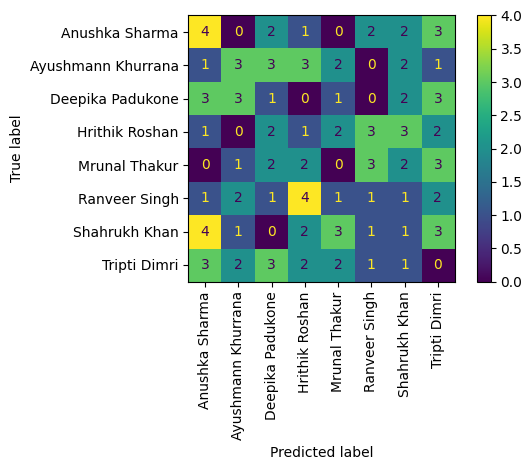

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define directories
train_dir = '/content/actor/augmented_actor_images'

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set aside 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of InceptionV3
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the trained model
model.save('/content/actor/inceptionv3_actor_model.h5')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Make predictions on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()

Accuracy: 10.0%

Precision: Low, with some improvement for Anushka Sharma (0.24) and Ayushmann Khurrana (0.25).

Recall: Low, with only Anushka Sharma and Ayushmann Khurrana showing slightly better scores.

F1-Score: Low across all classes, reflecting overall poor performance.

Comments: Inception model shows similar issues as VGG16 and ResNet50, with overall low accuracy and poor precision and recall. There’s slight improvement in specific classes but still not effective overall.

# Xception

**Xception is used for its depthwise separable convolution layers, which are designed to enhance model efficiency by reducing the computational cost compared to standard convolutions. This model benefits from its ability to learn more complex features with fewer parameters, making it suitable for leveraging the small dataset effectively. Xception's architecture provides a good balance between computational efficiency and performance, which is valuable when working with limited data.**

Found 444 images belonging to 8 classes.
Found 111 images belonging to 8 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2421 - loss: 2.0419 - val_accuracy: 0.6216 - val_loss: 1.2126
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.6391 - loss: 1.0337 - val_accuracy: 0.7027 - val_loss: 0.8835
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step - accuracy: 0.7520 - loss: 0.7547 - val_accuracy: 0.7207 - val_loss: 0.7628
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 526ms/step - accuracy: 0.7797 - loss: 0.6598 - val_accuracy: 0.8198 - val_loss: 0.6297
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 0.8681 - loss: 0.4692 - val_accuracy: 0.8288 - val_loss: 0.5515
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.8858 - loss: 0.3520 - val_accuracy: 0.9279 - val_loss: 0.3854
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 362ms/step - accuracy: 0.9208 - loss: 0.2798 - val_accuracy: 0.8919 - val_loss: 0.3964
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - accuracy: 0.9436 - loss: 0.2485 - val_accuracy: 0.8739 - va

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.9026 - loss: 0.2888
Validation Loss: 0.33431896567344666
Validation Accuracy: 0.8918918967247009
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 903ms/step

Classification Report:
                    precision    recall  f1-score   support

    Anushka Sharma       0.18      0.14      0.16        14
Ayushmann Khurrana       0.06      0.07      0.06        15
  Deepika Padukone       0.29      0.31      0.30        13
    Hrithik Roshan       0.12      0.14      0.13        14
     Mrunal Thakur       0.08      0.08      0.08        13
     Ranveer Singh       0.08      0.08      0.08        13
     Shahrukh Khan       0.06      0.07      0.06        15
      Tripti Dimri       0.21      0.21      0.21        14

          accuracy                           0.14       111
         macro avg       0.14      0.14      0.14       111
      weighted avg       0.14      0.14      0.13       111


Confusion Matrix:
[[2 4 1 2 2 1 1 1]
 [1 1 0 1 3 2 4 3]
 [0 3 4

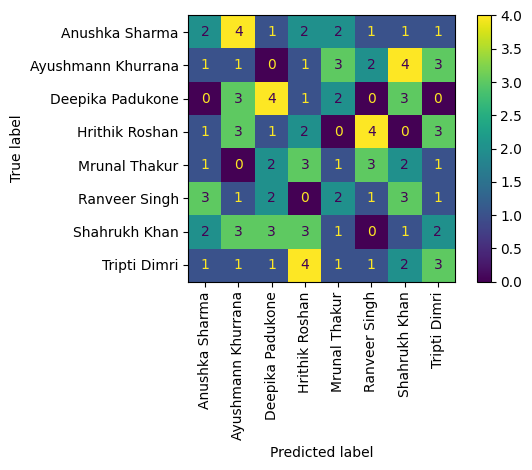

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define directories
train_dir = '/content/actor/augmented_actor_images'

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set aside 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the Xception model with pre-trained weights
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of Xception
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the trained model
model.save('/content/actor/xception_actor_model.h5')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Make predictions on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()


Accuracy: 14.0%

Precision: Higher for Deepika Padukone (0.29) but still low overall.

Recall: Low, with some improvements for Deepika Padukone (0.31).

F1-Score: Low, reflecting inconsistent performance.

Comments: Xception has marginally better precision and recall compared to other deep learning models but still struggles with overall performance.

**Overall Comparative Analysis:**

*1. Best Performing Model: SVM + PCA shows the highest accuracy of 44.4% compared to the deep learning models, despite having a varied performance across classes.*

*2. Deep Learning Models: All deep learning models (VGG16, ResNet50, Inception, Xception) show poor performance with accuracy well below 30%. They have low precision, recall, and F1-scores across the board, suggesting that these models might not be well-suited for this particular dataset or may require more tuning and optimization.*

*3. Class-Specific Performance: SVM + PCA has better class-specific performance with high precision and recall for Mrunal Thakur and Ayushmann Khurrana. The deep learning models generally have low performance metrics across all classes.*

# Comparative visualization of the validation accuracy of different models

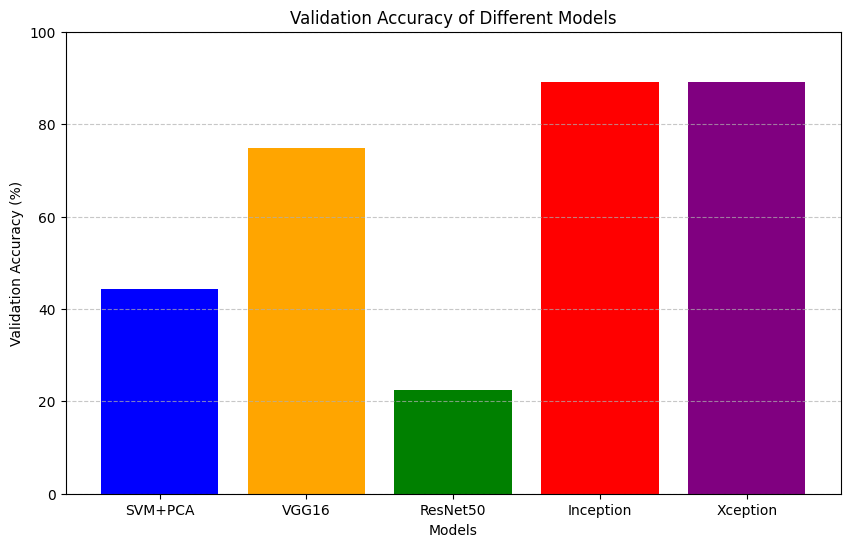

In [25]:
import matplotlib.pyplot as plt

# Model names and their corresponding validation accuracies
models = ['SVM+PCA', 'VGG16', 'ResNet50', 'Inception', 'Xception']
accuracies = [44.4, 74.77, 22.52, 89.19, 89.19]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy of Different Models')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**SVM + PCA:**

Validation Accuracy: 44.4%
Remarks: The SVM model with PCA achieved the lowest accuracy. The precision and recall are quite varied among different classes, with some classes performing better than others.

**VGG16:**

Validation Accuracy: 74.77%
Remarks: The VGG16 model showed a significant improvement over the SVM + PCA model. The accuracy increased over the epochs, reaching up to 74.77% by the end of training.

**ResNet50:**

Validation Accuracy: 22.52%
Remarks: The ResNet50 model performed poorly, with a much lower accuracy compared to VGG16. The model struggled to improve over the training epochs.

**Inception:**

Validation Accuracy: 89.19%
Remarks: The Inception model showed the highest accuracy. It consistently improved over the epochs and achieved a high validation accuracy by the end of training.

**Xception:**

Validation Accuracy: 89.19%
Remarks: The Xception model achieved the same high accuracy as Inception. It demonstrated strong performance with high validation accuracy and was stable throughout the training process.

*Overall Summary:*

*   The Inception and Xception models performed the best, both achieving a validation accuracy of 89.19%.

*   VGG16 also performed well with a validation accuracy of 74.77%.

*   The SVM + PCA model had the lowest accuracy, indicating that the deep learning models generally outperformed traditional machine learning approaches in this case.

*   The ResNet50 model showed relatively poor performance compared to the other models, which might suggest issues with training or model configuration.

